<div style="border:solid Chocolate 2px; padding: 40px">

<b>Катерина, привет!</b>

Меня зовут Евгений Головин, я буду ревьюером твоего проекта. Если ты не против, то предлагаю посмотреть наше общение на "ты" ;) Если удобнее на "вы", то нет проблем, только скажи об этом.

В ходе работы я оставил тебе комментарии <font color='green'>зеленого</font>, <font color='gold'>желтого</font> и <font color='red'>красного</font> цветов. Сейчас объясню, что они значат:

<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Решение на этом шаге является полностью правильным.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Решение на этом шаге станет еще лучше, если внести небольшие коррективы.
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
 Решение на этом шаге требует существенной переработки и внесения правок. Напоминаю, что проект не может быть принят с первого раза, если ревью содержит комментарии, рекомендующие доработать шаги.
</div>
    
Увидев мой комментарий, не удаляй его, он будет очень полезен в случае повторной проверки работы :)
    
<div class="alert alert-info">
<b>А свой помечай вот так, чтобы я его не потерял ;)</b> 
</div>
    
Увидев мой комментарий, не удаляй его, он будет очень полезен в случае повторной проверки работы :)
    
На мои комментарии можно и нужно реагировать, только делать это стоит так, чтобы твои и мои комменты не смешались: выделяй свои цветами, сильно отличающимися от моих.
    
Увидев у тебя неточность, в первый раз я лишь укажу на ее наличие и дам тебе возможность самому найти и исправить ее. На реальной работе твой руководитель будет поступать также, и я пытаюсь подготовить тебя именно к работе аналитиком. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку!

<div class="alert alert-info">
<b>Очень приятно познакомиться! Спасибо, что помогаете стать лучше) </b> 
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Рад быть полезным ;)

# Исследование надёжности заёмщиков
**Описание проекта**

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.
Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

**Описание данных**
- `children` — количество детей в семье
- `days_employed` — общий трудовой стаж в днях
- `dob_years` — возраст клиента в годах
- `education` — уровень образования клиента
- `education_id` — идентификатор уровня образования
- `family_status` — семейное положение
- `family_status_id` — идентификатор семейного положения
- `gender` — пол клиента
- `income_type` — тип занятости
- `debt` — имел ли задолженность по возврату кредитов
- `total_income` — ежемесячный доход
- `purpose` — цель получения кредита

## Решение задачи
### Шаг 1. Знакомство с данными и изучение общей информации.

Импортируем необходимые библиотеки для дальнейшей работы.

In [ ]:
import pandas as pd
import numpy as np
import seaborn

Чтение файла с данными и вывод первых десяти строчек таблицы для ознакомления.

In [2]:
client_data = pd.read_csv('bank_data.csv')
client_data.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


Для начала переименуем столбцы для удобства понимания их значений:
- `debt` -> `credit_debt` (имел ли задолженность по возврату кредитов);
- `income_type` -> `type_of_employment` (тип занятости);
- `total_income` -> `monthly_income` (ежемесячный доход)

In [3]:
client_data = client_data.rename(columns={'debt': 'credit_debt', 'income_type': 'type_of_employment', 'total_income': 'monthly_income'})
client_data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,type_of_employment,credit_debt,monthly_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


Получение информации о датафрейме.

In [4]:
client_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   children            21525 non-null  int64  
 1   days_employed       19351 non-null  float64
 2   dob_years           21525 non-null  int64  
 3   education           21525 non-null  object 
 4   education_id        21525 non-null  int64  
 5   family_status       21525 non-null  object 
 6   family_status_id    21525 non-null  int64  
 7   gender              21525 non-null  object 
 8   type_of_employment  21525 non-null  object 
 9   credit_debt         21525 non-null  int64  
 10  monthly_income      19351 non-null  float64
 11  purpose             21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Можно заметить, что значения отличаются только в двух столбцах и имеют одинаковое число явных пропусков. Проверим точное число пропусков и какую долю они составляют, если количество пропусков меньше 2-5%, то такие строки можно будет безболезненно удалить, в ином случае придется обработать пропуски и заполнить пропущенные значения.

In [5]:
# Какую долю составляют пропущенные значения в каждом из столбцов с пропусками
print('Всего значений в таблице {0}, из них пропущено {1}, доля пропущенных равна {2:.2%}.'.format(len(client_data), client_data['monthly_income'].isna().sum(), client_data['monthly_income'].isna().sum() / len(client_data)))

Всего значений в таблице 21525, из них пропущено 2174, доля пропущенных равна 10.10%.


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Так, хорошо

10% довольно существенная часть данных, значит просто убрать их нельзя.

**Наблюдение 1** : можно заметить, что пропуски есть только в двух столбцах `days_employed` и `monthly_income` и количество этих пропусков одинаково. 

*Теория по наблюдению:* разумно будет проверить, что пропуски в колонках с трудовым стажем и ежемесячным доходом наблюдаются у одних и тех же клиентов.

Узнаем разброс данных в каждом столбце, чтобы иметь представление о наполнении таблицы.

In [6]:
client_data.describe()

,children,days_employed,dob_years,education_id,family_status_id,credit_debt,monthly_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,1.935100e+04
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,1.674223e+05
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,1.029716e+05
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,1.030532e+05
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


**Наблюдение 2** : 
1. Можно заметить странные значения в столбце `children`(количество детей в семье), а именно минимальное значение `-1`, чего в реальной жизни не может быть, и максимальное значение `20`, что необычно, но возможно.
2. В столбце `days_employed`(общий трудовой стаж в днях) можно заметить такие аномалии как отрицательный трудовой стаж, например минимальный стаж равен `-18388` дням или 50 с небольшим годам. 
3. В столбце `days_employed`(общий трудовой стаж в днях) так же наблюдается необычный средний и максимальный трудовой стаж в `63046` дней и `401755` дней или 173 года и больше 1100 лет соответственно.
4. Возраст некоторых получателей кредита в столбце `days_employed` равен `0`, что является нарушением закона или ошибкой ввода.

*Теории по наблюдению:* 
1. `20` детей, как и `-1` значения резко выбивающиеся, из общего ряда. Нужно посчитать количество таких значений и в случае малого количества удалить, т.к. существенного влияния на качество данных они не окажут. Отрицательные значения в столбце `children` могут быть пропуском информации, вероятно их можно будет заменить на `0`, как при отсутствии детей.
2. 75% клиентов имеют отрицательный стаж можно попробовать исправить это, взяв значения по модулю.
3. Слишком высокий стаж может быть из-за одного-двух неверных значений, можно попробовать найти эти аномалии и удалить их из таблицы.
4. Возраст, равный `0`, может быть пропуском. Уместно проверить связаны ли эти пропуски с предыдущими найденными пропусками в `days_employed` и `monthly_income`.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Хорошо, согласен

### Шаг 2. Предобработка данных
#### *Работа с пропусками*

Проверим теорию из **наблюдения 1** - совпадают ли строки в `days_employed` и `monthly_income`, имеющие пропуски в значениях, или нет.

In [7]:
client_data[(client_data['days_employed'].isna() == True) & (client_data['monthly_income'].isna() == True)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 12 to 21510
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   children            2174 non-null   int64  
 1   days_employed       0 non-null      float64
 2   dob_years           2174 non-null   int64  
 3   education           2174 non-null   object 
 4   education_id        2174 non-null   int64  
 5   family_status       2174 non-null   object 
 6   family_status_id    2174 non-null   int64  
 7   gender              2174 non-null   object 
 8   type_of_employment  2174 non-null   object 
 9   credit_debt         2174 non-null   int64  
 10  monthly_income      0 non-null      float64
 11  purpose             2174 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 220.8+ KB


**Наблюдение 3**

***Теория получила подтверждение*** – в строках, где отсутствуют данные в столбце `days_employed`, отсутствуют данные и по `monthly_income`. 

*Теория по наблюдению:* стоит проверить относятся ли пропуски с одному типу занятости, возможно можно будет заменить значения средним по типу.

Проверим теорию из **наблюдения 3**, из разных ли профессий люди имеют пропуски в данных, если из одной, то можно будет заполнить NaN средним по этой группе.

In [8]:
client_data[(client_data['monthly_income'].isnull() == True) & (client_data['days_employed'].isnull() == True)]['type_of_employment'].value_counts()

сотрудник          1105
компаньон           508
пенсионер           413
госслужащий         147
предприниматель       1
Name: type_of_employment, dtype: int64

Из разных. Значит, взять среднее по одной группе профессий `type_of_employment` уже нельзя, будем заполнять NaN по среднему из каждой группы.

In [9]:
client_data['monthly_income'] = client_data['monthly_income'].fillna(client_data.groupby('type_of_employment')['monthly_income'].transform('median'))

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Заполнено медианой, это правильно, хотя написано, что будешь заполнять средним. Средним не надо

<div class="alert alert-info">
<b>Да, здесь случилась ошибка описания действий 😅 Среднее по типам занятости было бы с искажениями, из-за возможных аномалий в большую или меньшую сторону</b> 
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Понял, хорошо)

Плюсом такого заполнения пропусков является, то что каждый пенсионер с пропуском доходов, получает как средний пенсионер, а каждый работник - как средний работник.

Теперь можно проверить теорию о пропусках возраста из **наблюдения 2**.

In [10]:
print('Количество клиентов с нулевым возрастом:', client_data[client_data['dob_years'] == 0].count()[0])
client_data[(client_data['days_employed'].isna() == True) & (client_data['monthly_income'].isna() == True) & ((client_data['dob_years'] == 0) == True)].info()

Количество клиентов с нулевым возрастом: 101
<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   children            0 non-null      int64  
 1   days_employed       0 non-null      float64
 2   dob_years           0 non-null      int64  
 3   education           0 non-null      object 
 4   education_id        0 non-null      int64  
 5   family_status       0 non-null      object 
 6   family_status_id    0 non-null      int64  
 7   gender              0 non-null      object 
 8   type_of_employment  0 non-null      object 
 9   credit_debt         0 non-null      int64  
 10  monthly_income      0 non-null      float64
 11  purpose             0 non-null      object 
dtypes: float64(2), int64(5), object(5)
memory usage: 0.0+ bytes


Из 101 клиента с пропущенным возрастом, только 10 клиентов имеют пропущенные значения сразу в трех столбцах, а значит между пропусками в возрасте и в столбцах со стажем и доходом нет связи. ***Теория опровергнута.***

Проверим есть ли ещё несовершеннолетние в списках или только нулевой возраст. Если только нулевой, то возможна ошибка ввода данных и уместно будет заполнить средним значением по типу занятости.

In [11]:
print('Количество строк с возрастом равным 0 -', client_data[client_data['dob_years'] == 0].count()[0])
print('Количество строк с несовершеннолетними -', client_data[client_data['dob_years'] < 19].count()[0])

Количество строк с возрастом равным 0 - 101
Количество строк с несовершеннолетними - 101


Т.к. количество одних и других совпадает, то можно утверждать что это одни и те же люди. Заполним значения возраста средним по каждому типу занятости.

In [12]:
client_data['dob_years'] = client_data.groupby('type_of_employment')['dob_years'].transform(lambda x: x.replace(0, int(x.mean())))

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Хорошо, согласен

#### *Обработка аномалий*
Продолжим проверять теории из **наблюдения 2**.

Для этого узнаем сколько людей указали аномальные значения в столбце `children`и что можно с этими значениями сделать.

In [13]:
client_data['children'].value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

76 клиентов с `20` детьми - удаление такого количества строк не приведет к существенному ухудшению данных. 

47 человек, которые записали отрицательное количество детей с одной стороны их удаление тоже не приведет к ухудшению общей картины, с другой здесь легко исправить данные, заменив `-1` на `0`. Такое изменение статистику не испортит.

In [14]:
# Удаление аномальных строк
client_data = client_data.loc[client_data['children'] != 20]
#Замена значений в аномальных строках
client_data = client_data.replace({'children':{-1:0}})
client_data['children'].value_counts()

0    14196
1     4818
2     2055
3      330
4       41
5        9
Name: children, dtype: int64

Продолжим исследовать теории выдвинутые в **наблюдении 2**. Для этого можно создать сводную таблицу по каждому из типов занятости для того, чтоб разобраться с отрицательным стажем и выяснить, кто создает перекос значения среднего стажа.

Для каждого типа `type_of_employment` выведем следующее:
1) общее кол-во строк данного типа в таблице;

2) среднее значение по `days_employed`;

3) для проверки корректности вычисления среднего и применения abs() выведем кол-во значений по `days_employed` > 0 по данному `type_of_employment`.

In [15]:
client_data.groupby('type_of_employment').agg({'days_employed':['count', 'mean', lambda x: sum(x>0)]})

days_employed                          
                           count           mean <lambda_0>
type_of_employment                                        
безработный                    2  366413.652744        2.0
в декрете                      1   -3296.759962        0.0
госслужащий                 1311   -3398.915807        0.0
компаньон                   4558   -2116.633489        0.0
пенсионер                   3436  365011.937155     3436.0
предприниматель                1    -520.848083        0.0
сотрудник                   9974   -2325.075758        0.0
студент                        1    -578.751554        0.0

<div class="alert alert-info">
<b>Решила перенести  сюда перевод стажа в года, и сделать небольшой фильтр, если стаж больше возраста, то стаж делится на 10, потому что средние значения стажа безработных и пенсионеров больше 1000 лет.</b> 
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Понял, хорошо, давай)

In [16]:
client_data['days_employed'] = client_data['days_employed']/365
client_data = client_data.rename(columns={'days_employed': 'years_employed'})

client_data.loc[(client_data['years_employed'] > client_data['dob_years']), 'years_employed'] = client_data['years_employed'] / 10

print('Количество клиентов с завышенным стажем', client_data[client_data['years_employed'] > client_data['dob_years']].count()[0])

Количество клиентов с завышенным стажем 3438


Из полученной сводной таблицы видно, что значения по отработанным дням `days_employed` однотипны: по всем 'безработным' и 'пенсионерам' все значения больше 0, по остальным меньше 0, поэтому можем безболезненно применять `abs()`, считать среднее.

Для корректного заполнения пропущенных значений логично будет посчитать коэффициент полноты количества отработанных дней, учитывая, что официально можно трудиться с 16 лет, который будет рассчитан в столбце `ratio_days_employed` с учетом среднего этого показателя по группе.

In [17]:
client_data['years_employed'] = client_data['years_employed'].abs()
client_data['ratio_years_employed'] = client_data[client_data['years_employed'].notnull()]['years_employed']/((client_data['dob_years']-16)*365)
client_data['years_employed'] = client_data.groupby('type_of_employment')['years_employed'].transform(lambda x: x.fillna(x.mean()*client_data['dob_years']*365))

После заполнения данных медианными и средними значениями, можно удалить вспомогательный столбец.

In [18]:
client_data = client_data.drop('ratio_years_employed', axis=1)

In [19]:
print('Количество клиентов с завышенным стажем', client_data[client_data['years_employed'] > client_data['dob_years']].count()[0])
print('Количество клиентов со стажем больше 100 лет -', client_data[client_data['years_employed'] > 100].count()[0])
print('Количество клиентов со стажем больше 1000 лет -', client_data[client_data['years_employed'] > 1000].count()[0])

Количество клиентов с завышенным стажем 5603
Количество клиентов со стажем больше 100 лет - 3892
Количество клиентов со стажем больше 1000 лет - 2165


Больше половины клиентов банка имеют невероятный стаж, что может быть как ошибкой ввода, так и ошибкой расчета сотрудника. Как решить данное искажение я пока не имею идей. По возможности спросила бы совета.

<div class="alert alert-info">
<b> Upd. </b>Всё равно 25% клиентов имеют завышенный стаж, что несомненно лучше, чем половина, но все равно не так приятно. Мне кажестя такое возможно, если человек в какой-то период жизни работал на нескольких работах, например журналистом в нескольких изданиях, и эти трудовые стажи сложились. 
Есть два варианта решенния проблемы в таком случае:
    
1) разделить на 10 значения стажа, если сотрудник действительно ошибся при заполнении;

2) заменить таким клиентам стаж на максимально возможный, т.е. вычесть из их возраста 16, как возраст с которого можно официально работать.
    
<b>Здесь тоже считаю уместным спросить совета как лучше поступить)</b>
 
</div>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

<b>На доработку🤔:</b> Думаю, что оптимальным решением будет найти порог, более которого ты все значения разделишь на 10. Скорее всего при заполнении произошла ошибка, сотрудник забыл поставить точку

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Хм, интересно, да. Думаю, что второй вариант будет оптимальнее

#### *Замена типа данных*
Месячную зарплату `monthly_income` и стаж в днях `days_employed` переводим в `int`, так же кажется уместным заменить стаж по дням на годовой стаж.
Используем функцию `astype`, т.к. столбцы у нас имеют чистый формат `float64`, т.е. перевод в `int` будет безопасным. 
<div class="alert alert-info">
<b> </b> Upd. Стаж из дней в года теперь переведен чуть раньше.
</div>

In [20]:
client_data['years_employed'] = client_data['years_employed'].astype('int64')
client_data['monthly_income'] = client_data['monthly_income'].astype('int64')
client_data.head()

,children,years_employed,dob_years,education,education_id,family_status,family_status_id,gender,type_of_employment,credit_debt,monthly_income,purpose
0,1,23,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья
1,1,11,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,15,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья
3,3,11,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование
4,0,93,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу


In [21]:
client_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21449 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   children            21449 non-null  int64 
 1   years_employed      21449 non-null  int64 
 2   dob_years           21449 non-null  int64 
 3   education           21449 non-null  object
 4   education_id        21449 non-null  int64 
 5   family_status       21449 non-null  object
 6   family_status_id    21449 non-null  int64 
 7   gender              21449 non-null  object
 8   type_of_employment  21449 non-null  object
 9   credit_debt         21449 non-null  int64 
 10  monthly_income      21449 non-null  int64 
 11  purpose             21449 non-null  object
dtypes: int64(7), object(5)
memory usage: 2.6+ MB


Все данные представлены в довольно удобном формате. Месячную зарплату и стаж перевели в 'int', чтобы видеть целочисленные значения. В остальном типы данных везде выглядят хорошо.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Верно, молодец

In [22]:
client_data.describe()

,children,years_employed,dob_years,education_id,family_status_id,credit_debt,monthly_income
count,21449.000000,2.144900e+04,21449.000000,21449.000000,21449.000000,21449.000000,2.144900e+04
mean,0.472143,4.895947e+04,43.499371,0.817148,0.973099,0.080796,1.652211e+05
std,0.751339,2.964910e+05,12.234339,0.548507,1.420521,0.272528,9.811308e+04
min,0.000000,0.000000e+00,19.000000,0.000000,0.000000,0.000000,2.066700e+04
25%,0.000000,2.000000e+00,34.000000,1.000000,0.000000,0.000000,1.077720e+05
50%,0.000000,7.000000e+00,43.000000,1.000000,0.000000,0.000000,1.425940e+05
75%,1.000000,9.100000e+01,53.000000,1.000000,1.000000,0.000000,1.955370e+05
max,5.000000,2.664587e+06,75.000000,4.000000,4.000000,1.000000,2.265604e+06


<div class="alert alert-info">
<b> После изучения указанных тобой замечаний подумала, что перед тем как делить клиентов на категории, неплохо бы еще раз поглядеть на то, чем наполнен датафрейм)</b> 

2 миллиона лет стажа у кого-то, этот человек явно очень ценный сотрудник. 

Но важнее другое. Доходы распределены немного иначе, чем те категории, что применены чуть ниже. Возможно новое распределение доходов должно быть примерно таким:
    - до 60 000;    
    - до 120 000;  
    - до 180 000;  
    - больше 180 000.

Такие категории близки к равномерному распределению и выглядят похожими на жизненные.

</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Так было бы точно лучше разделить данные. Хорошая работа!

#### *Обработка дубликатов*
В этом блоке необходимо почистить данные от повторяющихся значений. Если в данных присутствуют строки-дубликаты, необходимо удалить их. Также нужно проверить таблицу на неявные дубликаты.

In [23]:
# Подсчет явных дубликатов в таблице
print('В таблице есть {0} одинаковых строки.'.format(client_data.duplicated().sum()))

В таблице есть 54 одинаковых строки.


In [24]:
# Удаление явных дубликатов
client_data.drop_duplicates(inplace=True, ignore_index= True)

Проверим столбцы с текстом на неявные дубликаты.

In [25]:
print('Уникальные значения столбца \'education\'', client_data['education'].sort_values().unique())
print('Уникальные значения столбца \'family_status\'', client_data['family_status'].sort_values().unique())
print('Уникальные значения столбца \'gender\'', client_data['gender'].sort_values().unique())
print('Уникальные значения столбца \'type_of_employment\'', client_data['type_of_employment'].sort_values().unique())
print('Уникальные значения столбца \'purpose\'', client_data['purpose'].sort_values().unique())

Уникальные значения столбца 'education' ['ВЫСШЕЕ' 'Высшее' 'НАЧАЛЬНОЕ' 'НЕОКОНЧЕННОЕ ВЫСШЕЕ' 'Начальное'
 'Неоконченное высшее' 'СРЕДНЕЕ' 'Среднее' 'УЧЕНАЯ СТЕПЕНЬ'
 'Ученая степень' 'высшее' 'начальное' 'неоконченное высшее' 'среднее'
 'ученая степень']
Уникальные значения столбца 'family_status' ['Не женат / не замужем' 'в разводе' 'вдовец / вдова' 'гражданский брак'
 'женат / замужем']
Уникальные значения столбца 'gender' ['F' 'M' 'XNA']
Уникальные значения столбца 'type_of_employment' ['безработный' 'в декрете' 'госслужащий' 'компаньон' 'пенсионер'
 'предприниматель' 'сотрудник' 'студент']
Уникальные значения столбца 'purpose' ['автомобили' 'автомобиль' 'высшее образование'
 'дополнительное образование' 'жилье' 'заняться высшим образованием'
 'заняться образованием' 'на покупку автомобиля'
 'на покупку подержанного автомобиля' 'на покупку своего автомобиля'
 'на проведение свадьбы' 'недвижимость' 'образование' 'операции с жильем'
 'операции с коммерческой недвижимостью' 'операции с

**Наблюдение 4** : 
1. Уникальные значения столбца `education` отличаются только регистром.
2. Уникальные значения столбца `family_status` не нуждаются в корректировке.
3. Уникальные значения столбца `gender` содержит некоторое количество пропущенных значений, возможно эти пропуски не влияют на качество данных.
4. Уникальные значения столбца `type_of_employment` не нуждаются в корректировке.
5. Уникальные значения столбца `purpose` имеют четыре основные категории, описанные разными словами.

*Теория по наблюдению:* 
1. Для столбца `education` разумно использовать метод `.lower()`, чтобы привести значения к одному стилю.
2. Значения столбца `family_status` не нуждаются в корректировке, но для общности данных тоже можно использовать метод `.lower()`.
3. Значения столбца `gender` не нуждаются в корректировке.
4. Значения столбца `type_of_employment` не нуждаются в корректировке.
5. Уникальные значения столбца `purpose` очень разнородны и будет логичнее создать дополнительный столбец с обобщенными категориями.

In [26]:
# Удаление неявных дубликатов
client_data['education'] = client_data['education'].str.lower()
client_data['family_status'] = client_data['family_status'].str.lower()
client_data.head()

,children,years_employed,dob_years,education,education_id,family_status,family_status_id,gender,type_of_employment,credit_debt,monthly_income,purpose
0,1,23,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья
1,1,11,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,15,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья
3,3,11,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование
4,0,93,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Согласен, молодец!

#### *Категоризация данных*

Создадим два новых датафрейма со столбцами:
- `education_id` и `education` — в первом;
- `family_status_id` и `family_status` — во втором.

Удалим из исходного датафрейма столбцы education и family_status, оставив только их идентификаторы: `education_id` и `family_status_id`. 

In [27]:
# Создание двух вспомогательных словарей
education_dict = client_data[['education', 'education_id']]
family_status_dict = client_data[['family_status', 'family_status_id']]
# Удаление ненужных столбцов
client_data = client_data.drop('education', axis=1)
client_data = client_data.drop('family_status', axis=1)

На основании диапазонов, указанных ниже, создадим столбец `total_income_category` с категориями:
- 0–30000 — 'E';
- 30001–50000 — 'D';
- 50001–200000 — 'C';
- 200001–1000000 — 'B';
- 1000001 и выше — 'A'.

Например, кредитополучателю с доходом 25000 нужно назначить категорию 'E', а клиенту, получающему 235000, — 'B'.

In [28]:
def categorize_income(row):
    monthly_income = row['monthly_income']
    if  monthly_income <= 30000:
        return 'E'
    elif 30000 < monthly_income <= 50000:
        return 'D'
    elif 50000 < monthly_income <= 200000:
        return 'C'
    elif 200000 < monthly_income <= 1000000:
        return 'B'
    else:
        return 'A'

Создадим функцию, которая на основании данных из столбца `purpose` сформирует новый столбец purpose_category, в который войдут следующие категории:
- ‘операции с автомобилем’,
- ‘операции с недвижимостью’,
- ‘проведение свадьбы’,
- ‘получение образования’.

А так же функцию, которая разделит клиентов на тех у кого нет детей, тех у кого 1-2 ребенка и многодетных.

In [29]:
# Списки неявных дубликатов для основных категорий целей кредитов
def categorize_purpose(row):
    purpose = row['purpose']
    car_operations = 'автомоб'
    conducting_a_wedding = 'свадьб'
    getting_an_education = 'образован'
    purpose_category = ['операции с автомобилем', 'операции с недвижимостью', 'получение образования',
                        'проведение свадьбы']
    if car_operations in purpose:
        return str(purpose_category[0])
    elif getting_an_education in purpose:
        return str(purpose_category[2])
    elif conducting_a_wedding in purpose:
        return str(purpose_category[3])
    else:
        return str(purpose_category[1])

In [30]:
# Категории клиентов по количеству детей
def categorize_children(row):
    if row['children'] == 0:
        return 'нет детей'
    elif 1 <= row['children'] <= 2:
        return '1-2 ребенка'
    else:
        return 'многодетные'

In [31]:
client_data['monthly_income_category'] = client_data.apply(categorize_income, axis=1)
client_data['purpose_category'] = client_data.apply(categorize_purpose, axis=1)
client_data['children_category'] = client_data.apply(categorize_children, axis=1)

In [32]:
client_data.head(10)

,children,years_employed,dob_years,education_id,family_status_id,gender,type_of_employment,credit_debt,monthly_income,purpose,monthly_income_category,purpose_category,children_category
0,1,23,42,0,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью,1-2 ребенка
1,1,11,36,1,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем,1-2 ребенка
2,0,15,33,1,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью,нет детей
3,3,11,32,1,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования,многодетные
4,0,93,53,1,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы,нет детей
5,0,2,27,0,1,M,компаньон,0,255763,покупка жилья,B,операции с недвижимостью,нет детей
6,0,7,43,0,0,F,компаньон,0,240525,операции с жильем,B,операции с недвижимостью,нет детей
7,0,0,50,1,0,M,сотрудник,0,135823,образование,C,получение образования,нет детей
8,2,18,35,0,1,F,сотрудник,0,95856,на проведение свадьбы,C,проведение свадьбы,1-2 ребенка
9,0,5,41,1,0,M,сотрудник,0,144425,покупка жилья для семьи,C,операции с недвижимостью,нет детей


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Хорошо!


## Ответьте на вопросы
Ответы на вопросы можно разместить в ячейках тетрадок Jupyter Notebook с типом markdown.
- Есть ли зависимость между количеством детей и возвратом кредита в срок?
- Есть ли зависимость между семейным положением и возвратом кредита в срок?
- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
- Как разные цели кредита влияют на его возврат в срок?

Ответы сопроводите интерпретацией — поясните, о чём именно говорит полученный вами результат.

Для ответа на вопрос о зависимости взаимосвязи количества детей и вероятностью возврата кредита построим сводную таблицу и посмотрим на полученные данные.

In [33]:
pd.pivot_table(client_data,
               index=['children_category'], 
               values=['credit_debt'],
               aggfunc=[np.mean, len])

,mean,len
,credit_debt,credit_debt
children_category,,
1-2 ребенка,0.092989,6861
многодетные,0.081579,380
нет детей,0.075173,14154


<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Верно. Хочу узнать, что ты думаешь по поводу категории многодетные. Можно ли по ней делать вывод, учитывая то, что в ней всего 380 случаев?

<div class="alert alert-info">
<b></b> Спасибо за замечание, по ~2% клиентов действительно можно представить неверные результаты. Можно попробовать изменить категории на `нет детей`, `1 ребенок` и `несколько детей`, с одной стороны такое разделение должно помочь, ведь расходы на одного ребенка могут сильно отличаться от расходов на двоих и более детей, к тому же, по крайней мере из моего опыта, только 1/5 часть семей имеет больше одного ребенка. Можно проверить как изменятся показатели, создав дополнительную категорию с предложенным разделением.
</div>

In [34]:
# Новые категории клиентов по количеству детей
def another_categorize_children(row):
    if row['children'] == 0:
        return 'нет детей'
    elif row['children'] == 1:
        return '1 ребенок'
    else:
        return 'многодетные'
# Добавим новый столбец    
client_data['another_children_category'] = client_data.apply(another_categorize_children, axis=1)
# И выведем сводную таблицу
pd.pivot_table(client_data,
               index=['another_children_category'], 
               values=['credit_debt'],
               aggfunc=[np.mean, len])

,mean,len
,credit_debt,credit_debt
another_children_category,,
1 ребенок,0.092327,4809
многодетные,0.092516,2432
нет детей,0.075173,14154


<div class="alert alert-info">
<b>  </b> 
Да, с новым разделением распределение клиентов стало чуть более равномерным, 11% все же не 2. Однако, вывод по способности возвращать кредит останется таким же - бездетные заемщики вернут кредит с болшей вероятностью.
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Правильно!

Исходя из полученной таблицы, можно сказать, что бездетные заемщики возвращают кредит немного чаще, чем те, у кого есть дети.

Проверим насколько семейное положение влияет на вероятность возврата заемных денег так же с помощью сводной таблицы. Уместно напомнить, что категории в `family_status_id` соответствуют следующим значениям
- `0` - женат / замужем, 
- `1` - гражданский брак, 
- `2` - вдовец / вдова,
- `3` - в разводе,
- `4` - не женат / не замужем.

In [35]:
pd.pivot_table(client_data,
               index=['family_status_id'], 
               values=['credit_debt'],
               aggfunc=[np.mean, len])

,mean,len
,credit_debt,credit_debt
family_status_id,,
0,0.075478,12295
1,0.092749,4151
2,0.065969,955
3,0.070411,1193
4,0.097465,2801


Исходя из полученной таблицы, можно сказать, что хуже всего кредит возвращают люди не связанные узами брака или живущие в гражданском браке, меньше всего не возвратов у вдов и вдовцов.

Узнаем есть ли зависимость между уровнем дохода и возвратом кредита в срок.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Согласен

In [36]:
pd.pivot_table(client_data,
               index=['monthly_income_category'], 
               values=['credit_debt'],
               aggfunc=[np.mean, len])

,mean,len
,credit_debt,credit_debt
monthly_income_category,,
A,0.080000,25
B,0.070490,5022
C,0.084752,15976
D,0.060000,350
E,0.090909,22


Из полученной таблицы, видно, что лучше всего возвращают кредиты люди с достатком примерно 30000–50000, а хуже всего с доходами меньше 30000.

Проверим есть ли зависимость между целью кредита и его возвратом.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

<b>На доработку🤔:</b> Не соглашусь. Вижу, что есть категории, которые слишком малы для того, чтобы делать по ним выводы.

<div class="alert alert-info">
Спасибо) После изучения распределения данных изменим категории, на те, которые указаны перед блоком обработки дубликатов.
</div>

In [37]:
# Новые категории клиентов по доходу
def another_categorize_income(row):
    monthly_income = row['monthly_income']
    if  monthly_income <= 70000:
        return 'до 70 000'
    elif 70000 < monthly_income <= 140000:
        return 'до 140 000'
    elif 140000 < monthly_income <= 200000:
        return 'до 200 000'
    else:
        return 'больше 200 000'
    
# Добавим новый столбец    
client_data['another_monthly_income_category'] = client_data.apply(another_categorize_income, axis=1)
# И выведем сводную таблицу
pd.pivot_table(client_data,
               index=['another_monthly_income_category'], 
               values=['credit_debt'],
               aggfunc=[np.mean, len])

,mean,len
,credit_debt,credit_debt
another_monthly_income_category,,
больше 200 000,0.070537,5047
до 140 000,0.084657,7997
до 200 000,0.087039,6882
до 70 000,0.068754,1469


<div class="alert alert-info">
<b></b> Новое распределение по более обширным категориям показывает отличные результаты от предыдущего разделения. По ним можно заметить что хуже отдают люди с доходом от 140 000 до 200 000, хотя показатель невозврата всего на 0,3% процента отличается от тех, чьи доходы от 70 000 до 140 000.
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Отличная работа в этом разделе. Категории стали относительно равночисленными, вывод верный. Молодец!

In [38]:
pd.pivot_table(client_data,
               index=['purpose_category'], 
               values=['credit_debt'],
               aggfunc=[np.mean, len])

,mean,len
,credit_debt,credit_debt
purpose_category,,
операции с автомобилем,0.093430,4292
операции с недвижимостью,0.072370,10778
получение образования,0.092273,3999
проведение свадьбы,0.078676,2326


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> С выводом по целям полностью согласен

Операции с недвижимостью самая надежная в плане возврата цель кредита, в отличие от покупки автомобиля.

## Общий вывод

Проведя данное исследование можно сказать, что самыми ответственными заемщиками должны быть заемщики с официально оформленными отношениями в настоящем или прошлом и не имеющие детей, с целью изменить жилищные условия и доходом от 30000 до 50000.

Проверить выводы поможет тепловая карта, построенная по сводной таблице с учетом всех вышеперечисленных категорий.

<AxesSubplot:xlabel='None-None', ylabel='children_category-family_status_id-monthly_income_category-purpose_category'>

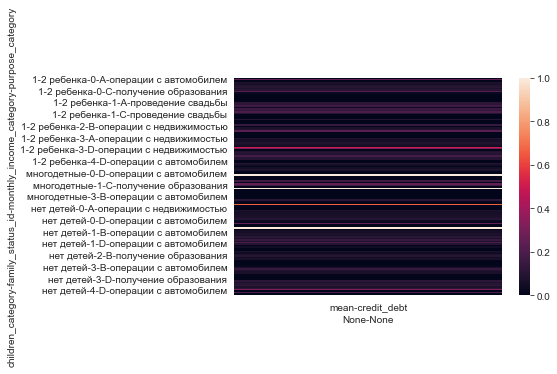

In [39]:
client_data_pivot = pd.pivot_table(client_data,
               index=['children_category', 'family_status_id', 'monthly_income_category', 'purpose_category'], 
               values=['credit_debt'],
               aggfunc=[np.mean])
seaborn.heatmap(client_data_pivot)

Одними из самых ярких на тепловой карте, а значит хуже всех возвращающими кредиты, являются клиенты, совмещающие следующие категории: 
- `многодетные`-`гражданский брак`-`доход от 50000 до 200000`-`операции с автомобилем`, 
- `многодетные`-`гражданский брак`-`доход от 200000 до 1000000`-`получениие образования`,
- `нет детей`-`гражданский брак`-`доход от 200000 до 1000000`-`операции с автомобилем`.

По одному такие наложившиеся друг на друга категории могли не вызывать опасений, но важно учитывать не только каждый отдельный фактор, но и совокупность с остальными.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

<b>На доработку🤔:</b>  Думаю, что нужно исключить из построения тепловой карты малочисленные категории, по которым нельзя сделать никакого вывода.

<div class="alert alert-info">
<b> Тепловая карта была криком отчаяния, когда не получилось правильно отсортировать сводную многоструктурную таблицу 😅
    </b> 
Разобравшись с сортировкой сводной таблицы можно сравнить выводы, увиденные на тепловой карте с табличными расчетами.
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> А, понял. Давай сравнивать)

In [40]:
client_data_pivot = pd.pivot_table(client_data,
               index=['another_children_category', 'family_status_id', 'another_monthly_income_category', 'purpose_category'], 
               values=['credit_debt'],
               aggfunc=[np.mean, len])
client_data_pivot.sort_values(by=('mean', 'credit_debt'))

mean  \
                                                                                                    credit_debt   
another_children_category family_status_id another_monthly_income_category purpose_category                       
1 ребенок                 2                до 70 000                       операции с недвижимостью       0.000   
многодетные               3                больше 200 000                  операции с автомобилем         0.000   
1 ребенок                 3                до 70 000                       операции с недвижимостью       0.000   
                          1                до 70 000                       операции с недвижимостью       0.000   
                                                                           получение образования          0.000   
...                                                                                                         ...   
многодетные               4                до 200 000                      операции с автомобилем         0.375   
                          3                до 70 000                       операции с автомобилем         0.500   
                          2                до 140 000                      операции с автомобилем         0.500   
                          3                до 70 000                       получение образования          1.000   
                                                                           операции с недвижимостью       1.000   

                                                                                                            len  
                                                                                                    credit_debt  
another_children_category family_status_id another_monthly_income_category purpose_category                      
1 ребенок                 2                до 70 000                       операции с недвижимостью           7  
многодетные               3                больше 200 000                  операции с автомобилем             4  
1 ребенок                 3                до 70 000                       операции с недвижимостью          10  
                          1                до 70 000                       операции с недвижимостью          15  
                                                                           получение образования             12  
...                                                                                                         ...  
многодетные               4                до 200 000                      операции с автомобилем             8  
                          3                до 70 000                       операции с автомобилем             2  
                          2                до 140 000                      операции с автомобилем             2  
                          3                до 70 000                       получение образования              1  
                                                                           операции с недвижимостью           1  

[187 rows x 2 columns]

<div class="alert alert-info">
Что же, графики не всегда легко прочитать правильно, чтобы полностью увидеть картину. Собрав данные из таблицы в сводную таблицу и отсортировав по среднему значению невозвратных кредитов можно отметить группы повышенного риска: 

- `многодетные` - `не женат / не замужем` - `до 200 000` - `операции с автомобилем`
- `многодетные` - `в разводе` - `до 70 000` - `операции с автомобилем`
- `многодетные` - `вдовец / вдова` - `до 140 000` - `операции с автомобилем`
- `многодетные` - `в разводе` - `до 70 000` - `получение образования`
- `многодетные` - `в разводе` - `до 70 000` - `операции с недвижимостью`

Хотя возможно это будет не самая показательная выборка, ведь в каждой указанной совокупности категорий есть только один-два заемщика.
    
<b>Ps.</b> Не подскажешь удобные платформы для работы с тетрадками? А то в Юпитере мне очень не хватает удобства PyCharm, где редактор подсказывает названия переменных и функций, а так же выводит информацию об аргументах функции. Нашла Datalore, от тех же разработчиков, но у него есть ограничение на суммарное время работы(
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Отлично!

<div style="border:solid Chocolate 2px; padding: 40px">
    
**Общий вывод по проекту ревьювера**:
 Екатерина, спасибо за проект! Ты приложила много усилий, чтобы довести его до конца, проделана огромная работа, и это видно невооруженным глазом, ты большой молодец!
    
**Отмечу положительные моменты**:
    
    1. Все разложено по полочкам, всегда понятен ход твоих мыслей, приятно смотреть
    
    2. На разных шагах проекта ты предлагала очень интересные решения и методы для их реализации. Хорошая работа!
    
    
**На что стоит обратить внимание**:
    
    1. На изменение аномалий в предобработке данных
    
    2. На то, что вывод можно делать только по нормальной по численности выборке, если сделать по малочисленной, то он будет не репрезентативен
    
    
**Удачи и жду твой проект на повторное ревью!**

<div style="border:solid Chocolate 2px; padding: 40px">
    
**Общий вывод по проекту ревьювера v2**:
 Екатерина, спасибо за работу, проект зачтен, поздравляю тебя! Увидимся в Практикуме! ;)